## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display

## Load Data

In [2]:
df = pd.read_csv('../Data/combined_data_cleaned.csv')

In [3]:
df.head(2)

,category,title,also_buy,brand,rank,also_view,main_cat,price,asin,overall,verified,reviewerID,summary,vote,style
0,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B0...",Lipton,"30,937 in Grocery & Gourmet Food (","['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B0...",Grocery,12.46,4639725043,5.0,True,A1J205ZK25TZ6W,Best for brewed iced tea.,8.0,NaN
1,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B0...",Lipton,"30,937 in Grocery & Gourmet Food (","['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B0...",Grocery,12.46,4639725043,3.0,True,ACOICLIJQYECU,Not Bad for iced Tea,9.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083170 entries, 0 to 1083169
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1083170 non-null  object 
 1   title       1083170 non-null  object 
 2   also_buy    926546 non-null   object 
 3   brand       1075197 non-null  object 
 4   rank        1039163 non-null  object 
 5   also_view   577060 non-null   object 
 6   main_cat    1081896 non-null  object 
 7   price       750231 non-null   float64
 8   asin        1083170 non-null  object 
 9   overall     1083170 non-null  float64
 10  verified    1083170 non-null  bool   
 11  reviewerID  1083170 non-null  object 
 12  summary     1082957 non-null  object 
 13  vote        149247 non-null   float64
 14  style       559212 non-null   object 
dtypes: bool(1), float64(3), object(11)
memory usage: 116.7+ MB


### Explore Data

#### Numeric Data
Overall rating, vote, and price.

In [5]:
df.describe()

,price,overall,vote
count,750231.000000,1.083170e+06,149247.000000
mean,20.851335,4.438979e+00,6.676134
std,17.742246,1.065677e+00,22.092402
min,0.010000,1.000000e+00,2.000000
25%,11.790000,4.000000e+00,2.000000
50%,16.980000,5.000000e+00,3.000000
75%,25.990000,5.000000e+00,6.000000
max,999.000000,5.000000e+00,2584.000000


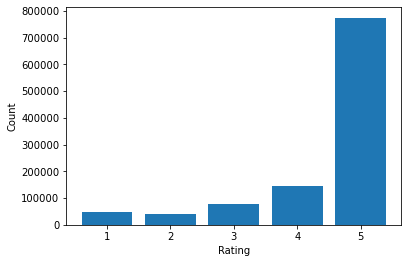

In [6]:
# overall rating
labels, counts = np.unique(df.overall, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The data is heavily skewed towards 5-star reviews.

In [7]:
# Some of the prices appear to be pretty high for groceries; but apparently valid.
df[df['price'] > 950].sort_values('price', ascending=False).head(2)

,category,title,also_buy,brand,rank,also_view,main_cat,price,asin,overall,verified,reviewerID,summary,vote,style
656762,"['Grocery & Gourmet Food', 'Produce', 'Dried F...",Dried Mediterranean Apricots 4 Lbs (in 4 - 16 ...,NaN,Golden State Fruit,"237,476 in Grocery & Gourmet Food (","['B077JGYNCY', 'B00DQV4DF8']",Grocery,999.0,B00AJ3OSMO,5.0,True,A1JH2B5871KG4X,Moist and Tasty,NaN,NaN
656789,"['Grocery & Gourmet Food', 'Produce', 'Dried F...",Dried Mediterranean Apricots 4 Lbs (in 4 - 16 ...,NaN,Golden State Fruit,"237,476 in Grocery & Gourmet Food (","['B077JGYNCY', 'B00DQV4DF8']",Grocery,999.0,B00AJ3OSMO,4.0,True,A107CTGSINY3GJ,Tastes good,NaN,NaN


In [8]:
df.groupby('main_cat')[['price']].agg(['mean', 'count'])

price        
                                mean   count
main_cat                                    
All Beauty                 13.374108    1553
Amazon Home                14.714298    6714
Arts, Crafts & Sewing      15.078947      19
Baby                        8.362963      27
Camera & Photo                   NaN       0
Cell Phones & Accessories        NaN       0
Grocery                    21.028930  705418
Health & Personal Care     18.873219   32203
Home Audio & Theater             NaN       0
Industrial & Scientific    27.418401    1126
Musical Instruments              NaN       0
Office Products            18.743421     570
Pet Supplies               24.327518     141
Software                         NaN       0
Sports & Outdoors          14.069673    1192
Tools & Home Improvement   27.470938      32
Toys & Games               11.267556     311

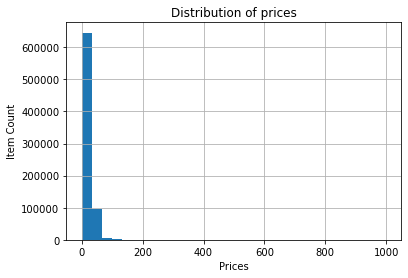

In [9]:
# Recommendation system may get skewed using price because of the non normal distribution.
df.price.hist(bins=30)
plt.xlabel('Prices')
plt.ylabel('Item Count')
plt.title('Distribution of prices')
plt.show()

In [10]:
# Very skewed. May need to narrow the price range in the future.
df.price[df['price'] < 100].describe()

count    748092.000000
mean         20.367076
std          12.620038
min           0.010000
25%          11.770000
50%          16.980000
75%          25.990000
max          99.990000
Name: price, dtype: float64

<AxesSubplot:>

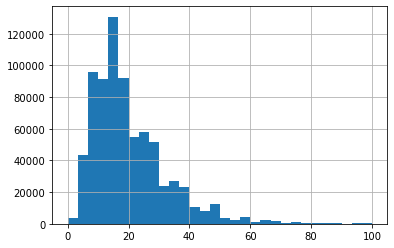

In [11]:
df.price[df['price'] < 100].hist(bins=30)

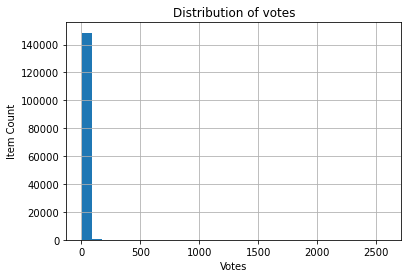

In [12]:
# vote has a wide standard deviation and is also highly skewed.
df.vote.hist(bins=30)
plt.xlabel('Votes')
plt.ylabel('Item Count')
plt.title('Distribution of votes')
plt.show()

<AxesSubplot:>

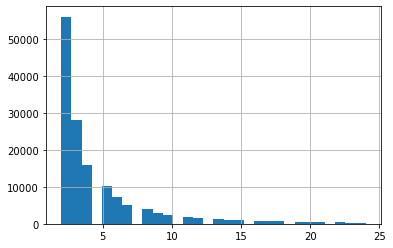

In [13]:
df.vote[df['vote'] < 25].hist(bins=30)

#### Boolean Data

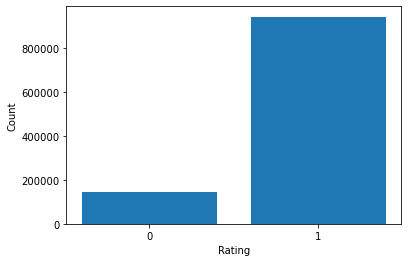

In [14]:
labels, counts = np.unique(df.verified, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xticks([0, 1])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Heat Map
None of the features are correlated.

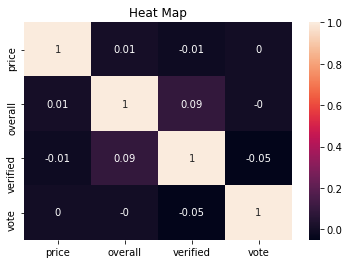

In [15]:
sns.heatmap(round(df.corr(), 2), annot=True)
plt.title('Heat Map')
plt.show()

#### Analyze Categories/Objects

In [16]:
df_objects = df.select_dtypes(include='object')
dfo_unique = pd.DataFrame(df_objects.nunique()).reset_index()
dfo_unique.columns = ['Features', 'Number of Categories']
dfo_unique.sort_values(by='Number of Categories', ascending=False)
dfo_unique

,Features,Number of Categories
0,category,1107
1,title,40969
2,also_buy,29115
3,brand,8861
4,rank,36865
5,also_view,21871
6,main_cat,17
7,asin,41280
8,reviewerID,127496
9,summary,526687


Except for the main_cat, there are too many unique categories for several traditional types of exploratory data analysis to be helpful.
For example, one hot encoding using pd.get_dummies(df) runs into memory errors even when the biggest features are dropped from the analysis.
Therefore, in later notebooks will use options created specifically for recommendation systems. 

In [17]:
for col in df_objects.columns:
    counts = df[col].value_counts()
    print(f'Most common {col}:\n{counts.head(3)}\n')

Most common category:
['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Coffee', 'Single-Serve Capsules & Pods']    72200
['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Green']                              22883
['Grocery & Gourmet Food', 'Snack Foods', 'Bars', 'Nut Bars']                                               20207
Name: category, dtype: int64

Most common title:
KIND Bars, Dark Chocolate Nuts &amp; Sea Salt, Gluten Free, 1.4 Ounce Bars, 12 Count    9721
 Grocery &amp; Gourmet Food" />                                                         7625
Kind Bars, Madagascar Vanilla Almond, Gluten Free, Low Sugar, 1.4oz                     6036
Name: title, dtype: int64

Most common also_buy:
['B003TNANSO', 'B003TMZQC8', 'B00IZF0LCE', 'B003TN6FSG', 'B007PE7AV6', 'B00FBCZCWS', 'B00IZF0P98', 'B019EGM8G4', 'B00D3M2QP4', 'B019EGM90O', 'B00DILEFNQ', 'B003TN8JGC', 'B00HF7W2JS', 'B078GK557L', 'B00JA9LDH6', 'B0748DHRYG', 'B000ENUC3S', 'B003P7ZMXA', 'B0012

Possible issue #1: The most common details feature is empty.
Earlier, when cleaning the data there were checks for empty lists; however, not for empty dictionaries.
However, after further analysis the details feature is still useful because there are more than a million rows and only about 24k are empty.

Possible issue #2: The most common information in the summary column might be a duplicate of the overall column.
This could cause problems because the overall column is the target feature.

In [18]:
df['summary'].value_counts()

Five Stars                                                                           217187
Four Stars                                                                            34064
Three Stars                                                                           15391
One Star                                                                               6872
Two Stars                                                                              6278
                                                                                      ...  
... jerky and i have to say these are the best! I don't have teeth                        1
But very exspensive                                                                       1
Best sugar is from my home state.                                                         1
delicious. uncharacteristically (for Planters) not full of chemicals...just salt.         1
Love Cake Boss!                                                                 

In [19]:
df['overall'].value_counts()

5.0    774985
4.0    143550
3.0     77097
1.0     47323
2.0     40215
Name: overall, dtype: int64

In [20]:
# Yes, these columns do have a lot of overlap. Therefore, dropping summary.
df.drop('summary', axis=1, inplace=True)

#### Grouping by target

Grouping by 'overall' rating to show the average highest and lowest product ratings.

In [21]:
non_target_features = df.columns.drop('overall')
for feature in non_target_features:
    overall_grouping_avg = df.groupby(feature)[['overall']].mean()
    display(overall_grouping_avg.sort_values('overall', ascending=False))

,overall
category,
"['Grocery & Gourmet Food', 'Produce', 'Fresh Vegetables', 'Tomatillos']",5.000000
"['Grocery & Gourmet Food', 'Cooking & Baking', 'Cooking Oils, Vinegars & Sprays', 'Oils', 'Safflower']",5.000000
"['Grocery & Gourmet Food', 'Herbs, Spices & Seasonings', 'Single Herbs & Spices', 'Ajowan']",5.000000
"['Grocery & Gourmet Food', 'Meat & Seafood', 'Pork', 'Ribs']",5.000000
"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Eggs & Egg Substitutes', 'Egg Whites']",5.000000
...,...
"['Grocery & Gourmet Food', 'Produce', 'Packaged Produce', 'Cut & Packaged Fruits', 'Mangoes']",3.043478
"['Grocery & Gourmet Food', 'Canned, Jarred & Packaged Foods', 'Packaged Meals & Side Dishes', 'Mexican Dishes', 'Burritos']",3.000000
"['Grocery & Gourmet Food', 'Olives, Pickles & Relishes', 'Olives', 'Greek']",2.800000


,overall
title,
"Celestial Seasonings Herbal Tea, Bengal Spice, (2 Pack)",5.0
SweetGourmet Dark Chocolate Espresso Coffee Beans (2Lb),5.0
Sweetarts Candy Canes 12ct.,5.0
"COPES CORN SWEET DRIED, 7.5 OZ (3 pack)",5.0
Clement Faugier Creme de Marrons de l'Ardeche Chestnut Spread,5.0
...,...
"Grove Square Coffee Single Serve Coffee Cup for Keurig K-Cup Brewers with Bonus Creamer, 48-Count",1.2
"Brach's Candy Corn, 11 Ounce Bag, Pack of 12",1.0
Factory Card and Party Outlet Passover Bag of Plagues,1.0


,overall
also_buy,
"['B00KUPB79S', 'B00JIYH2K0', 'B006EIB4PW', 'B007PRVELU', 'B00XGNE23O', 'B00KUPETO8', 'B001H0FI22', 'B00YLI8YO6', 'B001H0FHZA', 'B00NMQADC4', 'B00KUPE2CM', 'B00DR4JYA8', 'B00FZYX21K', 'B001H0FHXW', 'B00W0EYBTK', 'B003F0XHUM', 'B000K26JF8', 'B005LZVKL2', 'B001H0FI36', 'B0018D15BG', 'B00U1P8RF4', 'B076NXZ7LG', 'B01C5Y9AAE', 'B007ECMSAW', 'B0083J60CW', 'B00V9BH2EG', 'B003EAAMRO', 'B01H2T79CS', 'B016E1XXRU', 'B00EIAEZ2M', 'B00NHXH8D4', 'B00SX7RHPI', 'B00404ONB4', 'B009EFKXR2', 'B0774R3SRJ', 'B01C605YN4', 'B006DAREDM', 'B00AZW16QA', 'B01HPXC9US', 'B07CT9PQ5P', 'B00802QZV8', 'B009NKTK4U', 'B00CD2MWYU', 'B01C3R6B00', 'B0030Z95B2', 'B00LGXV9T6', 'B003YVHJ92', 'B004FUUC9U', 'B004MJ1V44', 'B01IHQYE1O', 'B07H9JXX72', 'B07BQSTXHC', 'B000ODQQQA', 'B01C612AOY', 'B0759B12DG', 'B003U72WY2', 'B06XXWVPWJ', 'B071L8D3HT', 'B004MIV9V0', 'B00BLG3GLW', 'B00KUPM14S', 'B002ZPG0FM', 'B01D20HMHS', 'B072ZYB73Q', 'B00F51T2BW', 'B01M2VH0WU', 'B000K28B8Q', 'B01MV6K1BN', 'B016BQNUGW', 'B00DFSHMN2', 'B004V94B3I', 'B00W46R05Q', 'B07G19XTD3', 'B002L5LN80', 'B01GADGYJG', 'B000ODRYD4', 'B00BWNYHVC', 'B01ARLS8PU', 'B07B44JGNH', 'B07FDJ9SBM', 'B07DM27Y1Q', 'B00KUPKX34', 'B07DV4T9ND', 'B01M0MRD00', 'B07CSSHXGK', 'B004FP7P7W', 'B074DZWD4T', 'B00JIYHK7A', 'B00KUPGIYW', 'B075JK8XQB']",5.000000
"['B00O56V3WE', 'B0069UVB8U', 'B07FTSX49W', 'B00GMDSZSI', 'B0085SN7J0', 'B004SS632E', 'B00U33A39W', 'B009GJFBOG', 'B0187JTHW2', 'B0052T5HZ2', 'B00HQWPI8O', 'B0012XV382', 'B00GRW10FY', 'B006F63M8U', 'B01C51SWS8', 'B06WD4HJZP', 'B00BJ9URYA', 'B0046NVSG2', 'B00IR4Q9FG', 'B00O4VRLUI', 'B00PPLXMZO', 'B00KAWU4IQ', 'B00P5KD1KG']",5.000000
"['B00OFBJZWY', 'B000N0286G', 'B00OFC11WU', 'B000ET17VI', 'B000MZ7OUW', 'B00R2I2DH6', 'B00RA27OOQ', 'B000N0T30K', 'B00TZ8BK5W', 'B000ET1678', 'B005NEXK6Y', 'B01I6U4NAS', 'B000S60EFW', 'B000EICLI2', 'B00EJVKQ1E', 'B000EICJWA', 'B000OTPJWQ', 'B01K3XCU2E', 'B000QU3JM0', 'B00THOSQ8S', 'B01LYMD0NW', 'B01MFESP5G', 'B00FSH2314', 'B00TVAD8RM', 'B00886AVOI', 'B005J8DT0Q', 'B00PZLXTB6', 'B000EPPBRS', 'B01CZ8A022', 'B00X1D0BLQ', 'B007B1V5ZK', 'B00A3K69WA', 'B01CLQSKNY', 'B00HU8VMES', 'B00LYT2HCK', 'B00PRBL8T4', 'B01EDDEPUK', 'B004I5IC5I', 'B00KJJH0D2', 'B005MH0P5Q', 'B00I9P242U', 'B079KWN564', 'B00PRB2JQA', 'B000ESWFHE', 'B01B11N3LY', 'B0086XQ4XK', 'B00A32Y3WQ', 'B005UY77VQ', 'B002P8AQJ0', 'B01MR4F4T5', 'B014QEFBSG', 'B0758VGKDF', 'B000EICISA', 'B000MZ5JJA', 'B004T5MMYY', 'B00M8VSKW4', 'B000JMAVXA', 'B004AOFZRA', 'B01N46Y9AS', 'B01NAGWV2P', 'B00CNVK1AI', 'B01ATRHSYO', 'B06XX51N55', 'B00EAFNGMA', 'B01E5NIEKA', 'B000OC3EYI', '3334353648', 'B07BBT37K9', 'B01GUDEO0W', 'B00BUIKGU0', 'B00473PVVO', 'B0753ZM6JL', 'B077GGCHRZ', 'B00JUB8N3G', 'B000ETLVXC', '0449017052', 'B012U8CWDC', 'B06XKHQH9V', 'B0000CNU15', 'B0038Z7PZW', 'B006R1UE52', 'B00MSV9S7U', 'B00QGWM57M', 'B00DUMDNTU', 'B00XGVZH4Y', 'B007YY6O2I', 'B000EWMJ8U', 'B00JH638SO', 'B0091UW4QS', 'B002TRBNOO', 'B00B617XK2', 'B0001EJ4C0', 'B0086XQ8FO', 'B0019LFC2K', 'B00GN753JW', 'B072PS7VNG']",5.000000
"['B00OEC8GA6', 'B008IXRXYM', 'B01HHEEERQ', 'B004L045D8', 'B0086AJ1OC', 'B003J9Y4II', 'B004J0IDU6', 'B0092X768K', 'B00WLBSQMA', 'B006WWLX7O', 'B003J9ZWPW', 'B000FDOSN2', 'B003J9QJEA', 'B01MUQHGYA', 'B006WW1G8U', 'B00TG7T4B4', 'B0094Z2EOW', 'B00DXMSSRE', 'B004S1YCLK', 'B004RR435K', 'B0042M1W0Y', 'B004SIZZZA', 'B008IXQJ1K', 'B0049J3LRC', 'B004SI04C4', 'B001XSMANI', 'B00411W2O6', 'B009MMVGY6', 'B007N3KRYQ', 'B002BAYSKK', 'B004XRJ49E', 'B00KIWAUGY', 'B0094WX5RA', 'B0000DIYVM', 'B00D5VB58C', 'B004XRJ3ZE', 'B00KIWX318']",5.000000
"['B00OD23X82', 'B001IZBH0S', 'B000NWCZYY', 'B0028C44IM', 'B00OD23XE6', 'B00OD23WXI', 'B0195HL98U', 'B00KR163S0', 'B01N6KVQQ5', 'B00IGHA3MY', 'B01N6HNJ8S', 'B00FT9VRWW', 'B01808O0A4']",5.000000
...,...
"['B0054RRMRS', 'B00IV6JUK6', 'B0032123XQ', 'B000U94MN2', 'B00ZOIJO96', 'B001G8RNPU', 'B010WBZWT0', 'B00UCAGQXI', 'B000TMS0RE', 'B007UN97PY', 'B003QSORYS', 'B00RMX70NS', 'B000VHJPKI', 'B00TU7F46E', 'B00V92080U', 'B000PZQUZO', 'B002FW4WFK', 'B00JU4ROWE', 'B01FWNYJEC', 'B000TO9BR0', 'B000

,overall
brand,
Blue Runner Foods,5.000000
Tian Tao,5.000000
Inspired By Jane,5.000000
Frantoia,5.000000
Frantoia Barbera,5.000000
...,...
WaffleWaffle,1.714286
Tolerant Foods,1.714286
Drink Chia,1.500000


,overall
rank,
"126,465 in Grocery & Gourmet Food (",5.0
"112,845 in Grocery & Gourmet Food (",5.0
"320,667 in Grocery & Gourmet Food (",5.0
"112,762 in Grocery & Gourmet Food (",5.0
"233,328 in Grocery & Gourmet Food (",5.0
...,...
"760,848 in Grocery & Gourmet Food (",1.2
"143,507 in Grocery & Gourmet Food (",1.0
"478,636 in Grocery & Gourmet Food (",1.0


,overall
also_view,
"['B06VSHBBQZ', 'B00AK4ADQ2', 'B0064OLJZ6', 'B079TMT6YB', 'B010GG3BBW', 'B01JKXC4JW', 'B00L4N5EB2', 'B06XQ563ZT', 'B0064OM1OE', 'B016C1RJ7C', 'B00AJSYVG2', 'B01K8V8G9C', 'B0064OM180', 'B0064OLK8W', 'B017GIQUZ2']",5.0
"['B06WD5MM71', 'B00ES8ORAE', 'B01LWJLH4G', 'B07H16PNTS']",5.0
"['B00DOORDNG', 'B01BCXMW7W', 'B07C2F85W4', 'B00S0AOFFI', 'B078J5G7RW', 'B0733WLT2W', 'B00113ZVAO', '1455589276', 'B071NH72NW']",5.0
"['B000WS1KEU', 'B001FXZITE', 'B00GWDHRKU', 'B07636CR25', 'B0095FWPZE', 'B005P0REUY', 'B003AYEHSY', 'B003AYEHT8']",5.0
"['B00DOKFLYI', 'B003HDJE5O', 'B001O8PRZA', 'B00QFR9X8W', 'B004579W2Q', 'B00HZSKMPS', 'B00UEXKVHA', 'B01MCTAWRO', 'B01BHD9UZ4', 'B079WP5VRG', 'B000VDX6TI', 'B01BHCNQR8', 'B00E1KXG0Q', 'B017QSG3LS', 'B000WSK5N2', 'B00LUXODLS', 'B00IU1T49E', 'B000EDDSE8', 'B00OZYNGUS', 'B00H4H0JXA']",5.0
...,...
"['B000LKVSDM', 'B003VYH8AM']",1.2
"['B074Q3CH6C', 'B000I07O10', 'B000CBEP9O', 'B00750E0X6', 'B0756FGPTF', 'B001V7P00G', 'B014GGH1AK', 'B07B4W2S8J', 'B075F87YJC', 'B0178CWDG6', 'B0057QMXRK', 'B0155QF4UO', 'B07F3GR5YN', 'B0016K91VW', 'B01M1DXIMK', 'B01A99GERO', 'B01DMZYWTY', 'B01M4RLHGW', 'B002MFKQQO', 'B007VHKFXW']",1.0
"['B00MPC4PCU', 'B01AP9E3W6', 'B008VUKZ9M', 'B00PFY0J4S', 'B000WG7HI0', 'B009F5AHNG', 'B07F7STZ1T', 'B01LY7KHQE', 'B07GL7MSKT', 'B003CEBBEA']",1.0


,overall
main_cat,
Cell Phones & Accessories,4.800000
Musical Instruments,4.625000
Industrial & Scientific,4.555371
Home Audio & Theater,4.545455
Sports & Outdoors,4.482058
Toys & Games,4.476804
Office Products,4.456627
Camera & Photo,4.444444
Grocery,4.439099


,overall
price,
38.69,5.000000
74.73,5.000000
50.49,5.000000
50.55,5.000000
73.60,5.000000
...,...
82.49,2.250000
24.34,2.200000
7.11,2.174757


,overall
asin,
B00F1MULHO,5.0
B00T4G1LVI,5.0
B006JY0SZI,5.0
B0019LRHBE,5.0
B0019LVGHA,5.0
...,...
B004TJF39G,1.2
B001684NJO,1.0
B0014AJV82,1.0


,overall
verified,
True,4.477156
False,4.186545


,overall
reviewerID,
A5XC3V39AEW6B,5.0
A27M44ZH1I7K97,5.0
A27LKFG857KLKH,5.0
ANSIFHFV7O9TU,5.0
A27LL2F4GCSHC3,5.0
...,...
A35ZBAPI1561RK,1.0
A1CH5GVACDJRPJ,1.0
A2VROW0VO43R0O,1.0


,overall
vote,
170.0,5.0
269.0,5.0
213.0,5.0
214.0,5.0
218.0,5.0
...,...
428.0,1.0
416.0,1.0
385.0,1.0


,overall
style,
"{'Size:': ' 7 Servings/ Box', 'Flavor:': ' Lemon'}",5.0
{'Size:': ' 1 lb Slivered Almond'},5.0
"{'Size:': ' 4.5-oz. Bag (Pack of 6)', 'Flavor:': ' Dark Chocolate'}",5.0
"{'Size:': ' 8 Ounce (Pack of 12)', 'Flavor:': ' Ranch'}",5.0
"{'Size:': ' 4.5-oz. Bag (Pack of 6)', 'Flavor:': ' Milk Chocolate'}",5.0
...,...
"{'Size:': ' 6 pack', 'Flavor:': ' Papaya'}",1.0
"{'Size:': ' Pack of 3', 'Flavor:': ' Organic'}",1.0
{'Flavor:': ' Tenessee Braspberry Tea'},1.0


The above also shows that most of the features have at least some distribution of the product's rating. 
The main exception is the verified boolean.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083170 entries, 0 to 1083169
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1083170 non-null  object 
 1   title       1083170 non-null  object 
 2   also_buy    926546 non-null   object 
 3   brand       1075197 non-null  object 
 4   rank        1039163 non-null  object 
 5   also_view   577060 non-null   object 
 6   main_cat    1081896 non-null  object 
 7   price       750231 non-null   float64
 8   asin        1083170 non-null  object 
 9   overall     1083170 non-null  float64
 10  verified    1083170 non-null  bool   
 11  reviewerID  1083170 non-null  object 
 12  vote        149247 non-null   float64
 13  style       559212 non-null   object 
dtypes: bool(1), float64(3), object(10)
memory usage: 108.5+ MB


Usually, would add default values for nulls in several of the columns either here, or earlier in the process.
However, for the recommendation systems it is expected that a significant amount of the data could be null.
Therefore, leaving this as is for now.

## Save Data

In [23]:
df.to_csv('../Data/eda_data.csv', index=False)

## Summary
- There are only 3 numeric (overall, price, and vote) and 1 boolean (verified) features in the data set.
- All of these are skewed toward one value or range of values.
    - Overall ratings are heavily skewed towards 5.
    - Both lower values for price and votes are most frequent.
    - Majority of reviews are verified.
- The majority of the features are categories/objects/text.
- Dropped the summary feature because it contained a lot of duplicate data with the target feature of overall rating.
- Most of the features have at least some distribution of the product's rating. The main exception is the verified boolean. 
- There are so many categories it wasn't possible to do one hot encoding because of memory issues.
- However, this didn't matter because will use processes designed specifically for recommendation systems to overcome these limitations.